In [8]:
from fastai.vision import *

Press Ctrl+Shift+J and paste the code in console to download image txt file

### Preparing dataset

In [41]:
folder = 'shinchan'
file = 'shinchann'

In [46]:
folder = 'tom&jerry'
file = 'tom'

In [48]:
folder = 'powerpuff_girls'
file = 'powerpuff'

In [51]:
folder = 'johnny_bravo'
file = 'johnny'

In [54]:
folder = 'spiderman'
file = 'spider_man'

In [57]:
folder = 'ironman'
file = 'iron'

In [58]:
path = Path('/home/mr/user/Practice/cartoons/data')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)

In [59]:
download_images(path/file, dest, max_pics = 200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [60]:
classes = ['shinchan', 'tom&jerry', 'powerpuff_girls', 'johnny_bravo', 'spiderman','ironman']

In [62]:
for c in classes:
    print(c)
    verify_images(path/c, delete = True, max_workers = 8)

shinchan


tom&jerry


powerpuff_girls


johnny_bravo


spiderman


ironman


## Classification

In [63]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = ".", valid_pct = 0.2,
                                 ds_tfms = get_transforms(), size = 224,
                                  num_workers = 4).normalize(imagenet_stats)

In [64]:
data.classes

['ironman',
 'johnny_bravo',
 'powerpuff_girls',
 'shinchan',
 'spiderman',
 'tom&jerry']

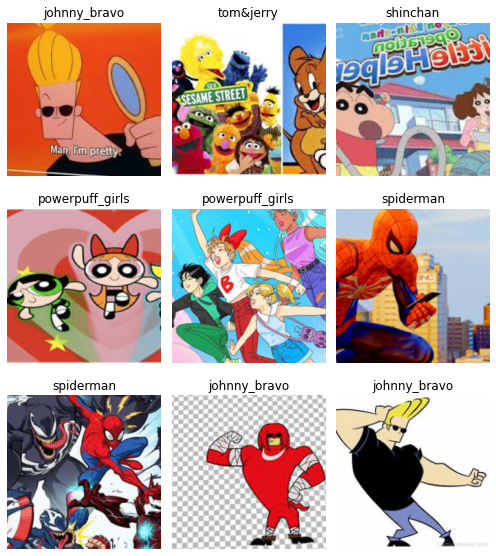

In [65]:
data.show_batch(rows=3, figsize=(7,8))

In [66]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ironman',
  'johnny_bravo',
  'powerpuff_girls',
  'shinchan',
  'spiderman',
  'tom&jerry'],
 6,
 768,
 192)

In [74]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [75]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.435890,0.845631,0.291667,00:09
1,1.503468,0.365757,0.104167,00:09
2,1.047872,0.283414,0.083333,00:10
3,0.764359,0.289837,0.098958,00:10
4,0.592101,0.244721,0.062500,00:09
5,0.468185,0.243741,0.052083,00:09
6,0.390922,0.235389,0.052083,00:09
7,0.332307,0.225232,0.052083,00:09
8,0.289716,0.220168,0.046875,00:09
9,0.254645,0.218712,0.052083,00:09


In [76]:
learn.save('stage-1')

In [77]:
learn.unfreeze()

In [78]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


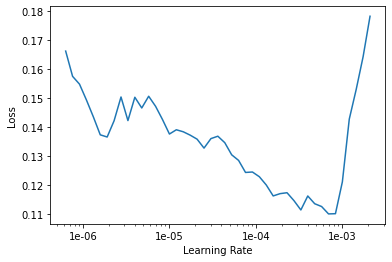

In [79]:
learn.recorder.plot()

In [82]:
learn.fit_one_cycle(3, max_lr = slice(4e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.083021,0.162700,0.046875,00:12
1,0.076920,0.182133,0.031250,00:13
2,0.080628,0.177490,0.026042,00:13


In [83]:
learn.save('stage-2')

## Interpretation

In [84]:
learn.load('stage-2')
interp = ClassificationInterpretation.from_learner(learn)

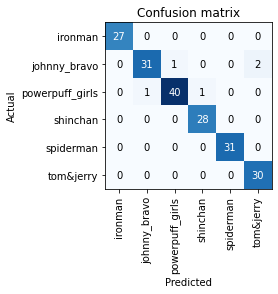

In [85]:
interp.plot_confusion_matrix()

### Production


In [90]:
learn.export()

In [91]:
defaults.device = torch.device('cpu')

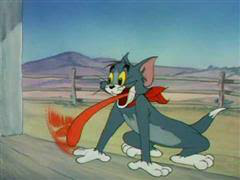

In [92]:
img = open_image(path/'test'/'images.jpg')
img

In [93]:
learn = load_learner(path)

In [94]:
pred_class, pred_idx, output = learn.predict(img)
pred_class

Category tom&jerry